# MNIST Convolutional Neural Network Classification Challenge

## Prepare Notebook

In [ ]:
!pip install --upgrade pip

In [49]:
# import libraries
import numpy as np
np.random.seed(123)

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [57]:
# load MNIST dataset and split into train/test
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print X_train.shape

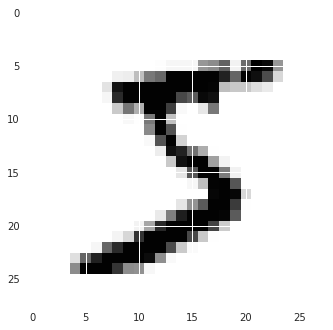

In [59]:
# check data loaded properly
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

## Preprocess Input Data

In [60]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [61]:
print X_train.shape

(60000, 1, 28, 28)


In [62]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## Preprocess Class Labels

In [63]:
print y_train.shape

(60000,)


In [64]:
print y_train[:10]

[5 0 4 1 9 2 1 3 1 4]


In [65]:
# convert 1-dimensional class arrays into 10-dimensional class matrices
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [66]:
print y_train.shape

(60000, 10)


In [67]:
print y_train[:10]

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Define Model Architecture

In [68]:
model = Sequential()

In [69]:
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28), data_format="channels_first"))

In [70]:
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [71]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

## Compile Model

In [72]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fit Model on Training Data

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)

## Evaluate Model on Test Data

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)